In [27]:
import numpy as np
from skimage.draw import circle
from skimage.measure import moments_central, moments
from skimage.segmentation import flood_fill, flood
from matplotlib import pyplot as plt

In [11]:
pic = np.zeros((1024, 1024))
pic[circle(612, 312, 250, shape=pic.shape)]=1

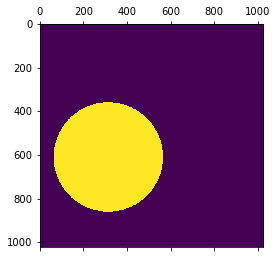

In [12]:
plt.matshow(pic)

In [15]:
M = moments(pic)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
centroid

(612.0, 312.0)

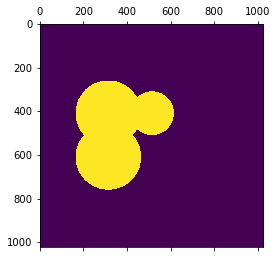

In [16]:
pic = np.zeros((1024, 1024))
pic[circle(612, 312, 150, shape=pic.shape)]=1
pic[circle(412, 312, 150, shape=pic.shape)]=1
pic[circle(412, 512, 100, shape=pic.shape)]=1
plt.matshow(pic)

In [17]:
M = moments(pic)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
centroid
pic[circle(*centroid, 10, shape=pic.shape)] = 2

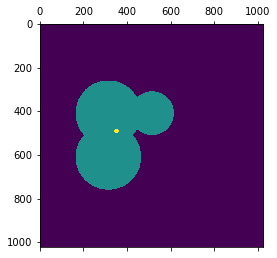

In [18]:
plt.matshow(pic)

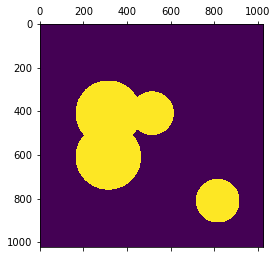

In [19]:
pic = np.zeros((1024, 1024))
pic[circle(612, 312, 150, shape=pic.shape)]=1
pic[circle(412, 312, 150, shape=pic.shape)]=1
pic[circle(412, 512, 100, shape=pic.shape)]=1
pic[circle(812, 812, 100, shape=pic.shape)]=1
plt.matshow(pic)

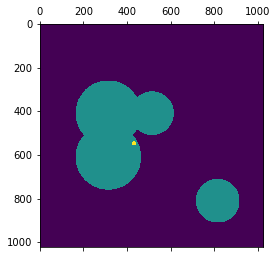

In [20]:

M = moments(pic)
centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
centroid
pic[circle(*centroid, 10, shape=pic.shape)] = 2
plt.matshow(pic)

In [21]:
pic = np.zeros((1024, 1024))
pic[circle(612, 312, 150, shape=pic.shape)]=1
pic[circle(412, 312, 150, shape=pic.shape)]=1
pic[circle(412, 512, 100, shape=pic.shape)]=1
pic[circle(812, 812, 100, shape=pic.shape)]=1

In [23]:
mask_coords = np.array(np.where(pic == 1))
mask_coords.shape

(2, 183674)

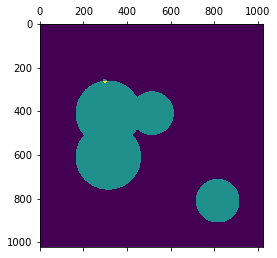

In [24]:
fig1 = mask_coords[:, 0]
pic_copy = np.copy(pic)
pic_copy[circle(*fig1, 10, shape=pic.shape)] += 1
plt.matshow(pic_copy)

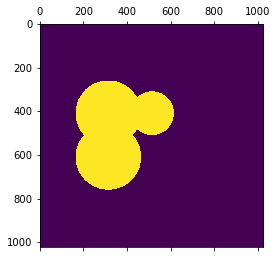

In [34]:
pic_copy = np.copy(pic)
pic_copy = flood(pic_copy, tuple(fig1), tolerance=0.5) 
plt.matshow(pic_copy)

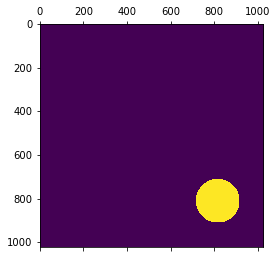

In [36]:
pic = flood_fill(pic, tuple(fig1), 0)
plt.matshow(pic)

In [39]:
def find_centroid(pic):
    from skimage.measure import moments
    import numpy as np
    
    if len(pic.shape) > 2:
        pic = np.copy(pic).reshape(list(pic.shape)[:-1])
    M = moments(pic)
    centroid = (M[1, 0] / M[0, 0], M[0, 1] / M[0, 0])
    
    return centroid

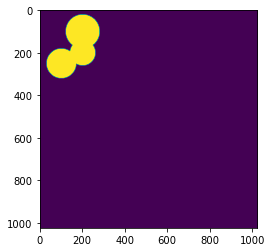

In [48]:
pic = np.zeros((1024, 1024))
pic[circle(200, 200, 60, shape=pic.shape)] = 1
pic[circle(250, 100, 70, shape=pic.shape)] = 1
pic[circle(100, 200, 80, shape=pic.shape)] = 1
plt.imshow(pic)

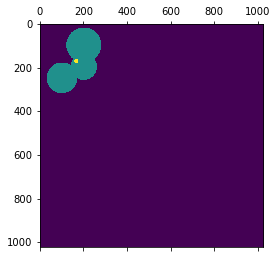

In [49]:
centroid = find_centroid(pic)
pic[circle(*centroid, 10, shape=pic.shape)] += 1
plt.matshow(pic)

In [54]:
def divide_figures(pic):
    import numpy as np
    from skimage.segmentation import flood, flood_fill
    
    coords = np.array(np.where(pic == 1))
    ans = []
    while coords.shape[1] != 0:
        seed_point = tuple(coords[:, 0])
        ans.append(flood(pic, seed_point))
        pic = flood_fill(pic, seed_point, 0)
        
        coords = np.array(np.where(pic == 1))
    
    return ans

In [53]:
a = np.zeros((10, 10))
np.array(np.where(a == 1)).shape

(2, 0)

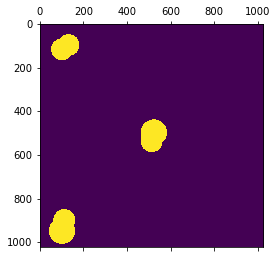

In [63]:
pic = np.zeros((1024, 1024))
pic[circle(100, 130, 50, shape=pic.shape)] = 1
pic[circle(120, 100, 50, shape=pic.shape)] = 1

pic[circle(500, 520, 60, shape=pic.shape)] = 1
pic[circle(540, 510, 50, shape=pic.shape)] = 1

pic[circle(900, 110, 50, shape=pic.shape)] = 1
pic[circle(950, 100, 60, shape=pic.shape)] = 1

plt.matshow(pic)

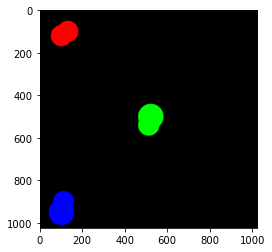

In [61]:
divided = divide_figures(pic)
plt.imshow(np.dstack(divided).astype(np.float32))

In [62]:
def find_centers_on_mask(mask, thr=0.8):
    import numpy as np
    
    mask = np.copy(mask) >= thr
    figures = divide_figures(mask)
    centers = []
    for figure in figures:
        centers.append(find_centroid(figure))
        
    return np.array(centers)